In [4]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#print(tf.__version__)

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [8]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [10]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [11]:
len(test_labels)

10000

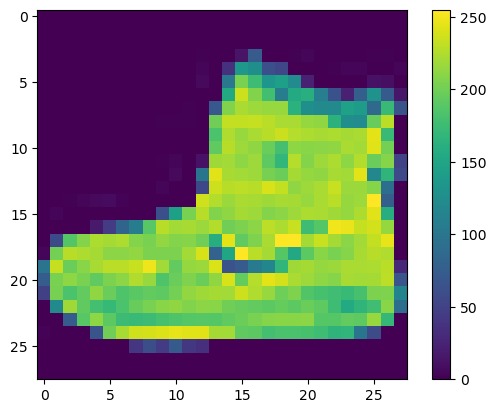

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

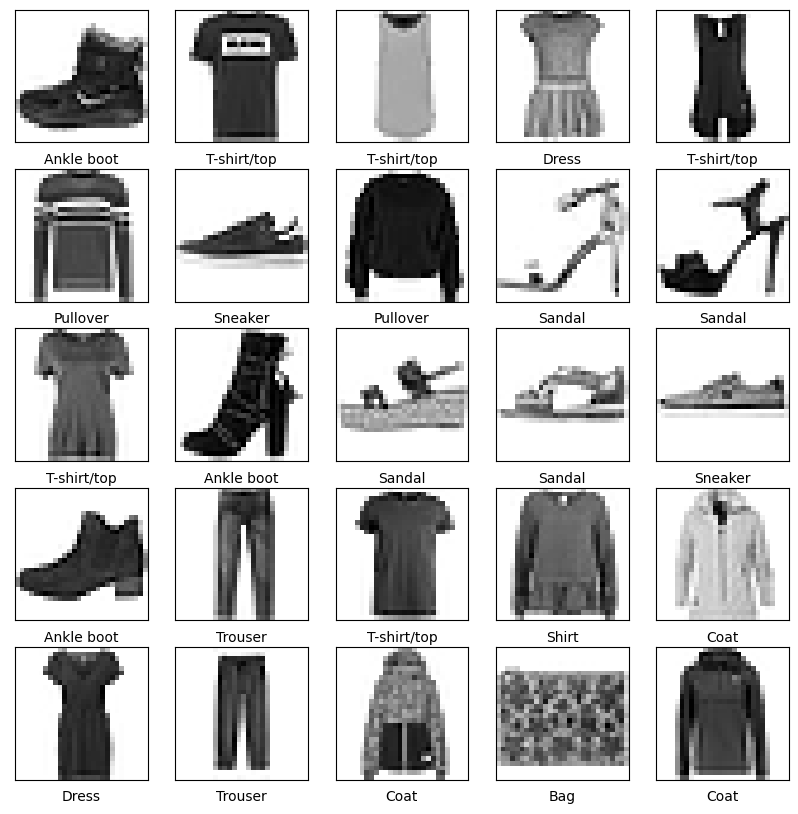

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5021 - accuracy: 0.8246
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3760 - accuracy: 0.8643
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3360 - accuracy: 0.8770
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3114 - accuracy: 0.8856
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2949 - accuracy: 0.8910
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2795 - accuracy: 0.8965
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2687 - accuracy: 0.9006
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2562 - accuracy: 0.9053
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2497 - accuracy: 0.9066
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.239

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.4063 - accuracy: 0.8885 - 2s/epoch - 6ms/step

Test accuracy: 0.8884999752044678


In [19]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 4ms/step


In [21]:
predictions[0]

array([4.0181901e-14, 3.1056342e-13, 6.8177353e-11, 1.3922261e-19,
       3.2237626e-12, 3.1120346e-06, 5.9221567e-10, 8.2644974e-06,
       4.7030396e-10, 9.9998868e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

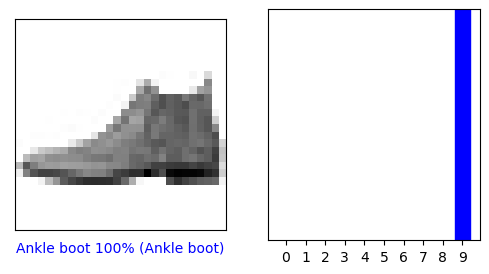

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

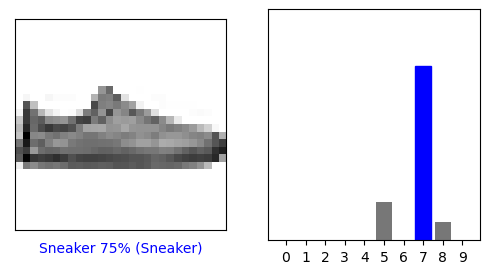

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

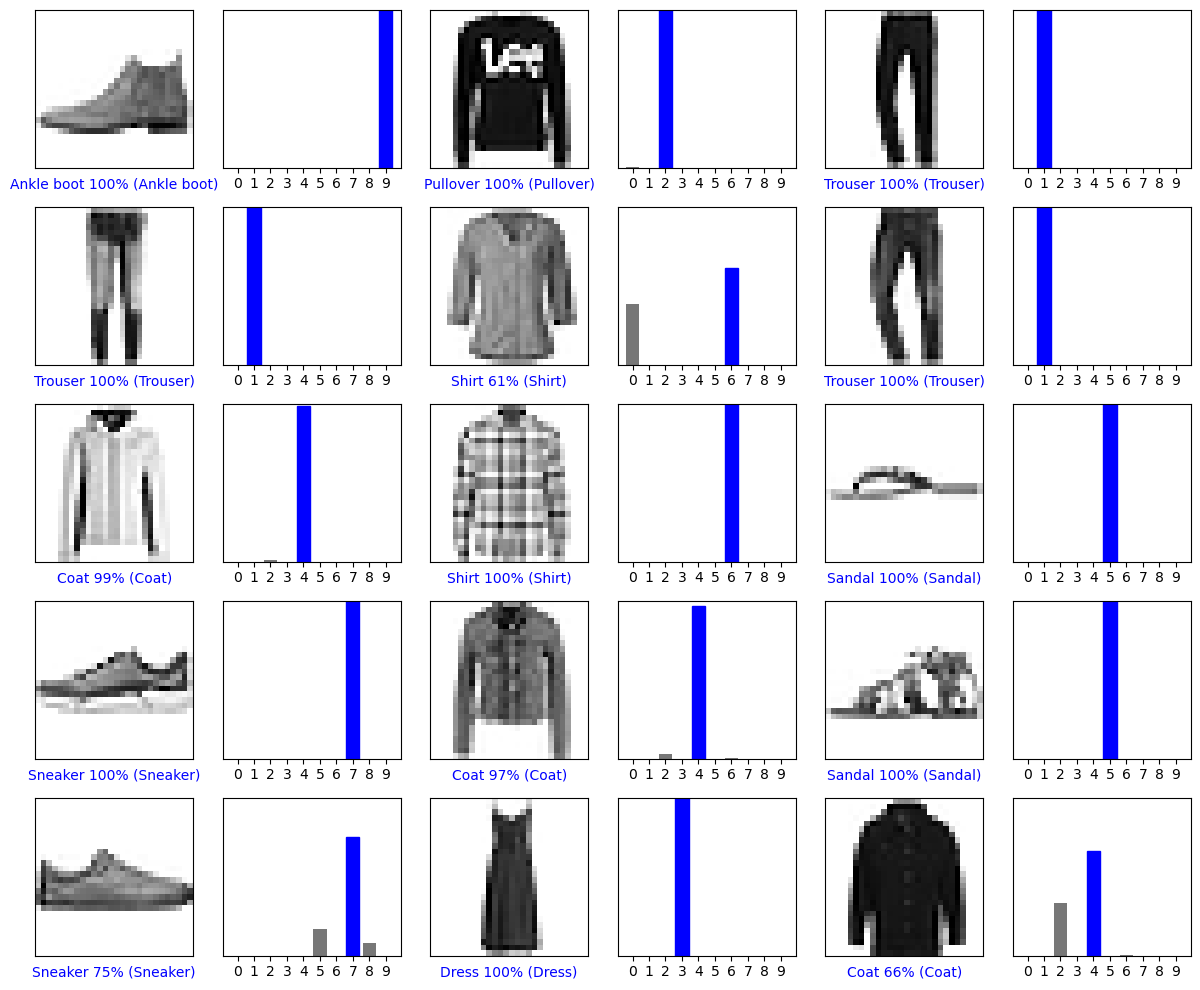

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 55ms/step
[[3.0293278e-03 1.0685170e-19 9.9693871e-01 1.0831459e-22 3.1360556e-05
  1.8499865e-11 6.4762804e-07 2.7312620e-26 1.7070582e-16 1.8040379e-16]]


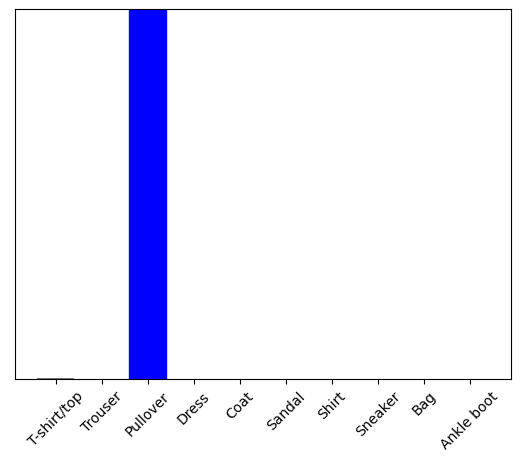

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

2